# assignment 2- Convolutional neural network (overview)

Part A: Explores the application of convolutional networks, data augmentation and ensemble techniques.

Part B: Focuses on transfer learning (specifically the use of CNNs as feature extractors and
the application of fine tuning with pre-trained CNNs).

Part C: Research component explores adversarial machine learning or capsule networks.

# in this part we have to focus on two important techniques

in this part we can only use SGD optimizer and not adam which is theoritically better

1. data augmentation- It is a very significant technique that can generate more data to train the network more data  means better performance but since this data is augmented we have some noise associated causing the osicllations. Noise addition can be correlated as a regularizer meaning our models are performing better as the are less prone to fitting the samples of the data and more to a generalized whole host of data meaning a much robust classifier,in this part we will make a total of 3 classifiers one basic CNN and two significantly deep CNN's the choice is our own how many layers deep we want out model to be, The deep CNN's can also be a specific architecture type used in literature but the key idea is it has to be built from scratch. In the secod sub part of this part we will try to incorporate the data augmentation techniques to see the impact on the accuracy than simply using it with the normal data

2. building checkpointing along with data augmentation for ensemble models

In [ ]:
# load the data from the google drive link provided
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1nEyRFqL3LbpZ8NfU6nsdSjjZ9bSGyndy',
                                    dest_path='./data1.h5')

# Implement a baseline CNN, which contains just a single convolutional layer, single pooling layer, fully connected layer and softmax layer

In [1]:
#let's begin by loading the data from the h5 file provided

import numpy as np
import h5py

def loadDataH5():
        
    with h5py.File('data1.h5','r') as hf:
        trainX = np.array(hf.get('trainX'))
        trainY = np.array(hf.get('trainY'))
        valX = np.array(hf.get('valX'))
        valY = np.array(hf.get('valY'))
        print (trainX.shape,trainY.shape)
        print (valX.shape,valY.shape)
    return trainX, trainY, valX, valY

trainX, trainY, testX, testY = loadDataH5()
#as we can see that we got 1020 images of train and 340 images of the test data
#the size of each image is 128*128 with each having three channels 
#also note that these values are normalized so we don't have to normalize them again


(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)


this is the total number of unique categories in train :17 and test :17


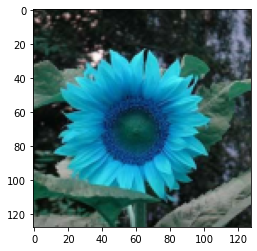

the label of the image is :  13


In [2]:
#let's begin by seeing a few of the images from the data set and see what labels do they correspond to
import numpy as np
unique_categories_in_train=len(np.unique(trainY, axis=0))
unique_categories_in_test=len(np.unique(testY, axis=0))

print("this is the total number of unique categories in train :{} and test :{}".format(unique_categories_in_train,unique_categories_in_test))
#so we can see we have 17 unique categories of flowers 
#let's try to see an individual image of the flower from train to see what label it corresponds to

import random
random_image_row_num=random.randint(0, trainX.shape[0]) #note uptill but not incliding the shape
image_pixels=trainX[random_image_row_num,:]

import matplotlib.pyplot as plt

plt.figure("Sample : "+str(random_image_row_num))
plt.imshow(image_pixels)
plt.show()


print("the label of the image is : ",trainY[random_image_row_num])


In [3]:
#we can now see that the flower itself is beautiful, just kidding i dont't know what flower you are looking at 
#as it is random for every run 

#let's bulid a model a simple CNN model with one conv layer one pooling layer and one fully connected layer with
#relu neurons and finally softmax classifier

import tensorflow as tf


class baseline_cnn: 
    @staticmethod
    def build(width, height, depth, classes,kernel_size,total_kernels):
        # initialize the model along with the input shape to be # "channels last"
        
        model = tf.keras.Sequential()
        #set the input shape for our first conv2d layer
        inputShape = (height, width, depth)
        # define the first (and only) CONV => RELU layer 
        #we want the size to be the same as input data hence padding = same is applied  and my activation is relu
        #by default strides is 1 below we can also specify it 
        #convolution layer
        model.add(tf.keras.layers.Conv2D (total_kernels, kernel_size, padding="same", input_shape=inputShape, activation='relu')) 
        #max pooling layer
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        #fully connected layer
        model.add(tf.keras.layers.Flatten()) 
        model.add(tf.keras.layers.Dense(84, activation='relu')) 
        # softmax classifier
        model.add(tf.keras.layers.Dense(classes, activation='softmax'))
        return model
    


# initialize the optimizer and model print("Compiling model...")
opt = tf.keras.optimizers.SGD(lr=0.01) #we can also use adam but for this assignment let's stick with sgd
NUM_EPOCHS = 30
kernel_size=(filter_height,filter_width)=(3,3)
classes=len(np.unique(trainY, axis=0)) #unique classes in the training data
total_kernels=16 #i will keep this lower as i don't want too many tunable params


model = baseline_cnn.build(width=trainX.shape[2], height=trainX.shape[1], depth=trainX.shape[3], classes=classes,total_kernels=total_kernels,kernel_size=kernel_size) 
#let's see model summary of our baseline model
print ( model.summary() )
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
# train the network
print("Training network...")

history = model.fit(trainX, trainY, validation_data=(testX, testY),
batch_size=32, epochs=NUM_EPOCHS)



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0         
_________________________________________________________________
dense (Dense)                (None, 84)                5505108   
_________________________________________________________________
dense_1 (Dense)              (None, 17)                1445      
Total params: 5,507,001
Trainable params: 5,507,001
Non-trainable params: 0
_________________________________________________________________
None
Training network...
Epoch 1/30
32/32 [==============================] - 1s 23ms/step - loss: 2.6041 - accur

KeyboardInterrupt: 

In [ ]:
# Plot training & validation accuracy values
def draw_plot(history):
    plt.figure("train vs validation loss")
    plt.plot(np.arange(0, NUM_EPOCHS), history.history["loss"], label="train_loss",linestyle='dashed',color="blue") 
    plt.plot(np.arange(0, NUM_EPOCHS), history.history["val_loss"], label="val_loss",linestyle='solid',color="red") 
    plt.title("Training Loss and validation loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend()
    plt.figure("train vs validation accuracy")
    plt.plot(np.arange(0, NUM_EPOCHS), history.history["accuracy"], label="train_acc",linestyle='dashed',color="blue")
    plt.plot(np.arange(0, NUM_EPOCHS), history.history["val_accuracy"], label="val_acc",linestyle='solid',color="red")
    plt.title("Training Accuracy and validation accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("accuracy")
    plt.legend()

#summary of the model 
#we are getting an accuracy of 100% on train data but barely performing well on test data 
#this is a clear indication of overfitting 

draw_plot(history)

In [ ]:
#le net architecture back in 1998
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://miro.medium.com/max/4308/1*1TI1aGBZ4dybR6__DI9dzA.png")


In [ ]:
#let's make 3 other CNN architectures with more deeper layers

#lenet with relu activation and max_pooling
#alex net without dropout  
#vgg net
#inception net
#resnet (if possible)

class Le_net_modified: 
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model along with the input shape to be # "channels last"
        model = tf.keras.Sequential()
        #set the input shape for our first conv2d layer
        inputShape = (height, width, depth)
        # define the first (and only) CONV => RELU layer 
        #we want the size to be the same as input data hence padding = same is applied  and my activation is relu
        #by default strides is 1 below we can also specify it 
        #convolution layer
        # we are setting padding = to same but original paper had no padding at all we can do that aswell
        #but we need to compare this model with our baseline hence i avoided
        #activations used in the original paper are sigmoid and not relu
        #the input shape is our custom input shape and not the original input shape which was 32*32
        model.add(tf.keras.layers.Conv2D (6, (5,5), padding="same", input_shape=inputShape, activation='relu')) 
        #max pooling layer instead of mean pooling which was originally there
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        #conv layer 2 and maxpool layer 2
        model.add(tf.keras.layers.Conv2D (16, (5,5), padding="same", activation='relu')) 
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        #3rd convolution layer 
        model.add(tf.keras.layers.Conv2D (120, (5,5), padding="same", activation='relu'))
        #fully connected layer
        model.add(tf.keras.layers.Flatten()) 
        model.add(tf.keras.layers.Dense(84, activation='relu')) 
        # softmax classifier
        model.add(tf.keras.layers.Dense(classes, activation='softmax')) #17 class classifier 
        return model
    

# initialize the optimizer and model print("Compiling model...")
opt = tf.keras.optimizers.SGD(lr=0.01) #we can also use adam but for this assignment let's stick with sgd
NUM_EPOCHS = 30
classes=len(np.unique(trainY, axis=0)) #unique classes in the training data

model = Le_net_modified.build(width=trainX.shape[2], height=trainX.shape[1], depth=trainX.shape[3], classes=classes) 
#let's see model summary of our baseline model
print ( model.summary() )
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
# train the network
print("Training network...")

history = model.fit(trainX, trainY, validation_data=(testX, testY),
batch_size=32, epochs=NUM_EPOCHS)
draw_plot(history)

#again we are overfitting but will later look at how to deal with it 


In [ ]:
#alex net architecture back in 1998
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://miro.medium.com/max/960/1*P1p6ubyxUATVoI_fceandQ.png")


In [ ]:
#alex net modified
#we are not using droputs and local response normalization because we are comparing it with simple baseline and
#we only want to see the impact of the deep layered CNN's
#we are not using rms prop as optimizer and using sgd
#padding is slightly changed


class alex_net_modified: 
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model along with the input shape to be # "channels last"
        model = tf.keras.Sequential()
        #set the input shape for our first conv2d layer
        inputShape = (height, width, depth)
        #layer 1 set
        model.add(tf.keras.layers.Conv2D (96, (11,11), strides=4,padding="same", input_shape=inputShape, activation='relu')) 
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
        #layer 2 set
        model.add(tf.keras.layers.Conv2D (256, (5,5), padding="same", activation='relu')) 
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
        #layer 3 set
        model.add(tf.keras.layers.Conv2D (384, (3,3), padding="same", activation='relu')) 
        model.add(tf.keras.layers.Conv2D (384, (3,3), padding="same", activation='relu')) 
        model.add(tf.keras.layers.Conv2D (256, (3,3), padding="same", activation='relu'))
        #layer 4 set
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
        #fully connected layer
        model.add(tf.keras.layers.Flatten()) 
        model.add(tf.keras.layers.Dense(4096, activation='relu')) 
        model.add(tf.keras.layers.Dense(4096, activation='relu'))
        # softmax classifier
        model.add(tf.keras.layers.Dense(classes, activation='softmax')) #17 class classifier 
        return model
    
# initialize the optimizer and model print("Compiling model...")
opt = tf.keras.optimizers.SGD(lr=0.01) #we can also use adam but for this assignment let's stick with sgd
NUM_EPOCHS = 30
classes=len(np.unique(trainY, axis=0)) #unique classes in the training data

model = alex_net_modified.build(width=trainX.shape[2], height=trainX.shape[1], depth=trainX.shape[3], classes=classes) 
#let's see model summary of our baseline model
print ( model.summary() )

#loss is sparse because we have int features
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
# train the network
print("Training network...")

history = model.fit(trainX, trainY, validation_data=(testX, testY),
batch_size=32, epochs=NUM_EPOCHS)
draw_plot(history)

#again we are overfitting but will later look at how to deal with it     
#we have significantly tackled overfitting but it still exists in small amount 
#also the accuracy on training data is lower now as compared to perviously which was very high 
#but overall we look at the validation accuracy

In [ ]:
#vgg net modified
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.researchgate.net/profile/Max_Ferguson/publication/322512435/figure/fig3/AS:697390994567179@1543282378794/Fig-A1-The-standard-VGG-16-network-architecture-as-proposed-in-32-Note-that-only.png")
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://qph.fs.quoracdn.net/main-qimg-e657c195fc2696c7d5fc0b1e3682fde6")

In [ ]:
class vgg_modified: 
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model along with the input shape to be # "channels last"
        model = tf.keras.Sequential()
        #set the input shape for our first conv2d layer
        inputShape = (height, width, depth)
        #layer 1 set blue
        model.add(tf.keras.layers.Conv2D (64, (3,3), strides=4,padding="same", input_shape=inputShape, activation='relu')) 
        model.add(tf.keras.layers.Conv2D (64, (3,3), padding="same", activation='relu'))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        #layer 2 set yellow
        model.add(tf.keras.layers.Conv2D (128, (3,3), padding="same", activation='relu'))
        model.add(tf.keras.layers.Conv2D (128, (3,3), padding="same", activation='relu'))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        #layer 3 set purple
        model.add(tf.keras.layers.Conv2D (256, (3,3), padding="same", activation='relu'))
        model.add(tf.keras.layers.Conv2D (256, (3,3), padding="same", activation='relu'))
        model.add(tf.keras.layers.Conv2D (256, (3,3), padding="same", activation='relu'))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        #layer 4 set green
        model.add(tf.keras.layers.Conv2D (512, (3,3), padding="same", activation='relu')) 
        model.add(tf.keras.layers.Conv2D (512, (3,3), padding="same", activation='relu')) 
        model.add(tf.keras.layers.Conv2D (512, (3,3), padding="same", activation='relu'))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        #layer 4 set red
        model.add(tf.keras.layers.Conv2D (512, (3,3), padding="same", activation='relu')) 
        model.add(tf.keras.layers.Conv2D (512, (3,3), padding="same", activation='relu')) 
        model.add(tf.keras.layers.Conv2D (512, (3,3), padding="same", activation='relu'))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        #fully connected layer
        model.add(tf.keras.layers.Flatten()) 
        model.add(tf.keras.layers.Dense(4096, activation='relu')) 
        model.add(tf.keras.layers.Dense(4096, activation='relu'))
        model.add(tf.keras.layers.Dense(4096, activation='relu'))
        # softmax classifier
        model.add(tf.keras.layers.Dense(classes, activation='softmax')) #17 class classifier 
        return model
    
# initialize the optimizer and model print("Compiling model...")
opt = tf.keras.optimizers.SGD(lr=0.01) #we can also use adam but for this assignment let's stick with sgd
NUM_EPOCHS = 30
classes=len(np.unique(trainY, axis=0)) #unique classes in the training data

model = vgg_modified.build(width=trainX.shape[2], height=trainX.shape[1], depth=trainX.shape[3], classes=classes) 
#let's see model summary of our baseline model
print ( model.summary() )

#loss is sparse because we have int features
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
# train the network
print("Training network...")

history = model.fit(trainX, trainY, validation_data=(testX, testY),
batch_size=32, epochs=NUM_EPOCHS)
draw_plot(history)



# let's try to implement data augmentation

In [ ]:
#we saw 4 different CNN actions without any use of dropouts and batch normalization were all over fitting
#to the train data 

#can we try to use data augmentation to add as a weak regularizer to the data make our models more robust
#and less prone to overfitting
#this will help us get more robust learning as evident in the dataset where there is rotation , blur, magnifying effect,
#location changed


# load the input image of the random sample we just used in the beggining of the ipynb
print(image_pixels.shape)

plt.imshow(image_pixels)
plt.show()

#for image data generator we need for dimnesions hence we are adding a dummy dimension using numpy
image = np.expand_dims(image_pixels, axis=0) 
print("this is my new image shape :",image.shape)

# construct the image generator for data augmentation
aug = tf.keras.preprocessing.image.ImageDataGenerator(
    #note we are not applying standardization as it is already applied
    rotation_range=20, #we want random rotation of upto 20 degrees
    width_shift_range=0.1, #width shift by 0.1 x
    shear_range=0.2, # s
    zoom_range=0.4, 
    horizontal_flip=True)

#let's make a new directory to store all the augmented images created
import os 
cwd = os.getcwd()
#print(cwd)
try:
    os.mkdir(cwd+"/output")
except:
    print("directory called output already exists writing new images to that directory ..")
imageGen = aug.flow(image, batch_size=1, save_to_dir='output', save_prefix='transformed',save_format='jpeg')
i=0
count=12 #how many images you want generate
for batch in imageGen:
    i += 1
    if i > count:
        break
        
# let's see the generated images
import matplotlib.image as mpimg
i=1
fig=plt.figure(figsize=(8, 8))
rows=count/4
columns=count/rows

for filename in os.listdir(cwd+"/output"):
    if filename.endswith(".jpeg"): 
         # print(os.path.join(directory, filename))
        #print(filename)
        try:
            fig.add_subplot(rows, columns, i)
        except:
            break
        augmented_image=mpimg.imread(cwd+"/output"+"/"+filename)
        #print(augmented_image)
        plt.imshow(augmented_image)
        i+=1
        continue
    else:
        print("not a valid filetype:{}".format(filename))
plt.show()

In [ ]:
#now feed all the training images for data augmentation

#expanding dimension
augmented_data = np.expand_dims(trainX, axis=0) 
print("this is my new image shape :",image.shape)

# construct the image generator for data augmentation
aug = tf.keras.preprocessing.image.ImageDataGenerator(
    #note we are not applying standardization as it is already applied
    rotation_range=20, #we want random rotation of upto 20 degrees
    width_shift_range=0.1, #width shift by 0.1 x
    shear_range=0.2, # s
    zoom_range=0.4, 
    horizontal_flip=True)

#fit on X_train data
aug.fit(trainX)

#define the model
model = baseline_cnn.build(width=trainX.shape[2], height=trainX.shape[1], depth=trainX.shape[3],
                           classes=classes,total_kernels=total_kernels,kernel_size=kernel_size)


#some more infor required at compiling such as the loss and metric and optimizer
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the network
print("Training network...")

# fits the model on batches with real-time data augmentation:
history=model.fit(aug.flow(trainX, trainY, batch_size=32),
                    steps_per_epoch=len(trainX) / 32, epochs=NUM_EPOCHS,validation_data=(testX, testY))


#let's see model summary of our baseline model
print ( model.summary() )



draw_plot(history)

#some general conclusions that can be made are
#we are no longer getting 100% or close to 100% train accuracy
#we got roughly 60% accuracy now
#data augmentation helped in combatting overfitting over lenet and reduced the loss from 2.28 to 1.25

In [ ]:
#let's see data augmentation impact on deeper CNN's

#define the model
model = Le_net_modified.build(width=trainX.shape[2], height=trainX.shape[1], depth=trainX.shape[3],
                           classes=classes)

#let's see model summary of our le net model
print ( model.summary() )

#some more infor required at compiling such as the loss and metric and optimizer
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the network
print("Training network...")

# fits the model on batches with real-time data augmentation:
history=model.fit(aug.flow(trainX, trainY, batch_size=32),
                    steps_per_epoch=len(trainX) / 32, epochs=NUM_EPOCHS,validation_data=(testX, testY))


#let's see model summary of our baseline model
print ( model.summary() )




draw_plot(history)
#we performed slightly better than baseline CNN with 65% accuracy and 1.09 loss value 
#also currently we are not overfitting to the train data as their is low difference in train and validation plots

In [ ]:
#let's see for even more deeper CNN network

#let's see data augmentation impact on deeper CNN's

#define the model
model = alex_net_modified.build(width=trainX.shape[2], height=trainX.shape[1], depth=trainX.shape[3],
                           classes=classes)


#let's see model summary of our alex net model
print ( model.summary() )

#some more infor required at compiling such as the loss and metric and optimizer
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the network
print("Training network...")

# fits the model on batches with real-time data augmentation:
history=model.fit(aug.flow(trainX, trainY, batch_size=32),
                    steps_per_epoch=len(trainX) / 32, epochs=NUM_EPOCHS,validation_data=(testX, testY))

draw_plot(history)

#originally alex net had about 1.41 loss and about 52% accuracy
#now alex net has similar range i.e 1.42 and about 52% accuracy

In [ ]:
#before we conclude any thing for alex net let's see if the performance is similar for vgg modified architecture
#which is even more deep

#let's see for even more deeper CNN network

#let's see data augmentation impact on deeper CNN's

#define the model
model = vgg_modified.build(width=trainX.shape[2], height=trainX.shape[1], depth=trainX.shape[3],
                           classes=classes)


#let's see model summary of our vgg model
print ( model.summary() )

#some more infor required at compiling such as the loss and metric and optimizer
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the network
print("Training network...")

# fits the model on batches with real-time data augmentation:
history=model.fit(aug.flow(trainX, trainY, batch_size=32),
                    steps_per_epoch=len(trainX) / 32, epochs=NUM_EPOCHS,validation_data=(testX, testY))



draw_plot(history)

#we could not resolve the overfitting problem in vgg network despite we used dataaugmentation

In [ ]:
#with data augmentation we dealt with overfitting problem but didn't get the significant boost 
#let's try to add a few new settings for our deeper models such as Alex net and VGG net to see if they improve
#we add more number of epochs to train
#we add dropouts for even more robust learning 
#we will increase the batch size so the model can see more data 
#we will also employ batch normalization
import tensorflow as tf
import numpy as np
class alex_net_modified_to_the_best: #as the name suggest this is the best possible way I could think 
    #of modifying alex net
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model along with the input shape to be # "channels last"
        model = tf.keras.Sequential()
        #set the input shape for our first conv2d layer
        inputShape = (height, width, depth)
        #layer 1 set
        model.add(tf.keras.layers.Conv2D (96, (11,11), strides=4,padding="same", input_shape=inputShape, activation='relu'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.SpatialDropout2D(0.5))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
        #layer 2 set
        model.add(tf.keras.layers.Conv2D (256, (5,5), padding="same", activation='relu'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.SpatialDropout2D(0.5))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
        #layer 3 set
        model.add(tf.keras.layers.Conv2D (384, (3,3), padding="same", activation='relu'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.SpatialDropout2D(0.5))
        model.add(tf.keras.layers.Conv2D (384, (3,3), padding="same", activation='relu')) 
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.SpatialDropout2D(0.5))
        model.add(tf.keras.layers.Conv2D (256, (3,3), padding="same", activation='relu'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.SpatialDropout2D(0.5))
        #layer 4 set
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
        #fully connected layer
        model.add(tf.keras.layers.Flatten()) 
        model.add(tf.keras.layers.Dense(4096, activation='relu')) 
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dropout(0.5))
        model.add(tf.keras.layers.Dense(4096, activation='relu'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dropout(0.5))
        # softmax classifier
        model.add(tf.keras.layers.Dense(classes, activation='softmax')) #17 class classifier 
        return model
    
# initialize the optimizer and model print("Compiling model...")
opt = tf.keras.optimizers.Adam(learning_rate=0.001) #we can also use adam but for this assignment let's stick with sgd
NUM_EPOCHS = 60 #we have doubled the epochs as we have applied 0.5 dropout to conv2d layers and fully connected layers
classes=len(np.unique(trainY, axis=0)) #unique classes in the training data

model = alex_net_modified_to_the_best.build(width=trainX.shape[2], height=trainX.shape[1], depth=trainX.shape[3], classes=classes) 
#let's see model summary of our baseline model
print ( model.summary() )

#loss is sparse because we have int features
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
# train the network
print("Training network...")

# train the network
print("Training network...")

# fits the model on batches with real-time data augmentation:
history=model.fit(aug.flow(trainX, trainY, batch_size=256),
                    steps_per_epoch=len(trainX) / 256, epochs=NUM_EPOCHS,validation_data=(testX, testY))


draw_plot(history)

#let's compare alext net best to the one with only data augmentation
#i know we are training for large epochs and larger batch size with better optimizer 
#and with dropouts and batch norm

#but what are the conclusions 
#all this helped us reduce the validation loss from 1.44 to 1.24 and almost 5% gain in the accuracy

In [ ]:
class vgg_modified_to_the_best: 
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model along with the input shape to be # "channels last"
        model = tf.keras.Sequential()
        #set the input shape for our first conv2d layer
        inputShape = (height, width, depth)
        #layer 1 set blue
        model.add(tf.keras.layers.Conv2D (64, (3,3), strides=4,padding="same", input_shape=inputShape, activation='relu'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.SpatialDropout2D(0.5))
        model.add(tf.keras.layers.Conv2D (64, (3,3), padding="same", activation='relu'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.SpatialDropout2D(0.5))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        #layer 2 set yellow
        model.add(tf.keras.layers.Conv2D (128, (3,3), padding="same", activation='relu'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.SpatialDropout2D(0.5))
        model.add(tf.keras.layers.Conv2D (128, (3,3), padding="same", activation='relu'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.SpatialDropout2D(0.5))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        #layer 3 set purple
        model.add(tf.keras.layers.Conv2D (256, (3,3), padding="same", activation='relu'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.SpatialDropout2D(0.5))
        model.add(tf.keras.layers.Conv2D (256, (3,3), padding="same", activation='relu'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.SpatialDropout2D(0.5))
        model.add(tf.keras.layers.Conv2D (256, (3,3), padding="same", activation='relu'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.SpatialDropout2D(0.5))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        #layer 4 set green
        model.add(tf.keras.layers.Conv2D (512, (3,3), padding="same", activation='relu'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.SpatialDropout2D(0.5))
        model.add(tf.keras.layers.Conv2D (512, (3,3), padding="same", activation='relu'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.SpatialDropout2D(0.5))
        model.add(tf.keras.layers.Conv2D (512, (3,3), padding="same", activation='relu'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.SpatialDropout2D(0.5))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        #layer 4 set red
        model.add(tf.keras.layers.Conv2D (512, (3,3), padding="same", activation='relu'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.SpatialDropout2D(0.5))
        model.add(tf.keras.layers.Conv2D (512, (3,3), padding="same", activation='relu'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.SpatialDropout2D(0.5))
        model.add(tf.keras.layers.Conv2D (512, (3,3), padding="same", activation='relu'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.SpatialDropout2D(0.5))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        #fully connected layer
        model.add(tf.keras.layers.Flatten()) 
        model.add(tf.keras.layers.Dense(4096, activation='relu')) 
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dropout(0.5))
        model.add(tf.keras.layers.Dense(4096, activation='relu'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dropout(0.5))
        model.add(tf.keras.layers.Dense(4096, activation='relu'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dropout(0.5))
        # softmax classifier
        model.add(tf.keras.layers.Dense(classes, activation='softmax')) #17 class classifier 
        return model
    
# initialize the optimizer and model print("Compiling model...")
opt = tf.keras.optimizers.Adam(learning_rate=0.001) #we can also use adam but for this assignment let's stick with sgd
NUM_EPOCHS = 60 #we have doubled the epochs as we have applied 0.5 dropout to conv2d layers and fully connected layers
classes=len(np.unique(trainY, axis=0)) #unique classes in the training data

model = vgg_modified_to_the_best.build(width=trainX.shape[2], height=trainX.shape[1], depth=trainX.shape[3], classes=classes) 
#let's see model summary of our baseline model
print ( model.summary() )

#loss is sparse because we have int features
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
# train the network
print("Training network...")

# train the network
print("Training network...")

# fits the model on batches with real-time data augmentation:
history=model.fit(aug.flow(trainX, trainY, batch_size=64),
                    steps_per_epoch=len(trainX) / 64, epochs=NUM_EPOCHS,validation_data=(testX, testY))


draw_plot(history)

#this is still better than the previous implementation of vgg net which was drastically overfitting
#the model is better than last implementation of VGG
#last time loss=2.83 and acc=4.41%
#this time 2.47 loss and accuracy =13.24%


In [ ]:
from keras.models import load_model
  
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

base_model = applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (trainX.shape[2],trainX.shape[1],3))
#we will add our own layers we can 
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(classes, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [ ]:
print(model.summary())

# initialize the optimizer and model print("Compiling model...")
opt = tf.keras.optimizers.Adam(learning_rate=0.001) #we can also use adam but for this assignment let's stick with sgd
NUM_EPOCHS = 60 #no dropouts used hence same epochs
classes=len(np.unique(trainY, axis=0)) #unique classes in the training data


#loss is sparse because we have int features
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
# train the network
print("Training network...")

# train the network
print("Training network...")

# fits the model on batches with real-time data augmentation:
history=model.fit(aug.flow(trainX, trainY, batch_size=32),
                    steps_per_epoch=len(trainX) / 32, epochs=NUM_EPOCHS,validation_data=(testX, testY))


draw_plot(history,NUM_EPOCHS)

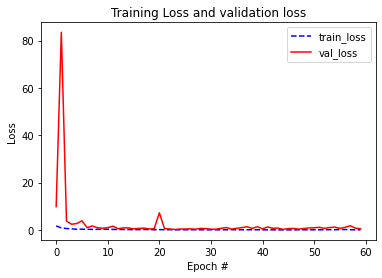

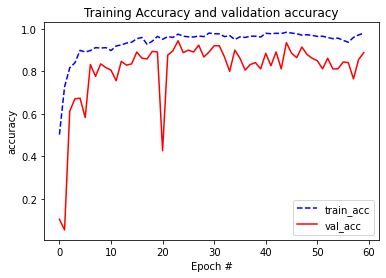

In [5]:
# Plot training & validation accuracy values
def draw_plot(history,ep):
    plt.figure("train vs validation loss")
    plt.plot(np.arange(0, ep), history.history["loss"], label="train_loss",linestyle='dashed',color="blue") 
    plt.plot(np.arange(0, ep), history.history["val_loss"], label="val_loss",linestyle='solid',color="red") 
    plt.title("Training Loss and validation loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend()
    plt.figure("train vs validation accuracy")
    plt.plot(np.arange(0, ep), history.history["accuracy"], label="train_acc",linestyle='dashed',color="blue")
    plt.plot(np.arange(0, ep), history.history["val_accuracy"], label="val_acc",linestyle='solid',color="red")
    plt.title("Training Accuracy and validation accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("accuracy")
    plt.legend()

#summary of the model 
#in just 2 -3 hours of our time and agood model we beat the detection task

draw_plot(history,NUM_EPOCHS)


In [ ]:
#let's save our hard work
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json() #convert model to json object
with open("resnet-50.json", "w") as json_file: #write this model in a json file
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("resnet-50.h5")
print("Saved model to disk")
 
# later...
 
# load json and create model
json_file = open('resnet-50.json', 'r')#save 
loaded_model_json = json_file.read()
json_file.close()

#convert model from json to usable model object
loaded_model = model_from_json(loaded_model_json)
# load weights into new model currenlty loaded
loaded_model.load_weights("resnet-50.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
print(testX.shape,testY.shape)
score = loaded_model.evaluate(testX, testY, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
print("loss : {}".format(score[0]))

In [ ]:
#we can see the output of our model here
#well i don't know the class names but let's call them numbers for now
import random
import time
import matplotlib.pyplot as plt
from keras.models import model_from_json

num=random.randint(0,testY.shape[0])
print(testX[num,:,:].shape)
image=testX[num,:,:]
plt.imshow(image)
image=np.expand_dims(image, axis=0)
start=time.time()

# load json and create model
json_file = open('resnet-50.json', 'r')#save 
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("resnet-50.h5")

o_p=loaded_model.predict(image)
end=time.time()
print("prediction time(in seconds): ",end-start)
print(o_p[0].shape)
print(o_p[0])
label=np.argmax(o_p[0])
chance=(max(o_p[0]))
print("="*20)
print("the predicted label of the image is :{} with confidence :{}".format(label,chance))
print("the actual label of the image is :",testY[num])

In [ ]:
#checkpointing a model
import tensorflow as tf
NUM_EPOCHS=30
kernel_size=(filter_height,filter_width)=(3,3)
classes=len(np.unique(trainY, axis=0)) #unique classes in the training data
total_kernels=16 #i will keep this lower as i don't want too many tunable params
fname = "best_weights.hdf5"
opt = tf.keras.optimizers.SGD(lr=0.01)

# construct the image generator for data augmentation
aug = tf.keras.preprocessing.image.ImageDataGenerator(
    #note we are not applying standardization as it is already applied
    rotation_range=20, #we want random rotation of upto 20 degrees
    width_shift_range=0.1, #width shift by 0.1 x
    shear_range=0.2, # s
    zoom_range=0.4, 
    horizontal_flip=True)

model = baseline_cnn.build(width=trainX.shape[2], height=trainX.shape[1], depth=trainX.shape[3], classes=classes,total_kernels=total_kernels,kernel_size=kernel_size) 

#let's see model summary of our baseline model
print ( model.summary() )
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the network
print("Training network...")

# fits the model on batches with real-time data augmentation:
checkpoint = tf.keras.callbacks.ModelCheckpoint(fname, monitor="val_accuracy",
mode="max", save_best_only=True, verbose=1) #track the maximum accuracy model and not min loss model

history=model.fit(aug.flow(trainX, trainY, batch_size=32),
                    steps_per_epoch=len(trainX) / 32, epochs=NUM_EPOCHS,
                  validation_data=(testX, testY),callbacks=[checkpoint])

#get the plot of the model
draw_plot(history,NUM_EPOCHS)

#to see if the model works at a particular check point
model = baseline_cnn.build(width=trainX.shape[2], height=trainX.shape[1], depth=trainX.shape[3], classes=classes,total_kernels=total_kernels,kernel_size=kernel_size)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
model.load_weights(fname)
scores = model.evaluate(testX, testY, verbose=0)
#we can tally it from the epoch number that the check pointing is really working 
print(scores)

In [ ]:
#now we will try to make a function out of this 
def check_pointing_model(model,trainX,trainY,testX,testY,name_of_this_model="default_model",epochs=30,
                     return_model=True,relate_by="loss",fname = "best_weights.hdf5"):
    """this function take a cnn model and returns the best checkpoint of model weights"""
    # construct the image generator for data augmentation
    
    
    aug = tf.keras.preprocessing.image.ImageDataGenerator(
            #note we are not applying standardization as it is already applied
            rotation_range=20, #we want random rotation of upto 20 degrees
            width_shift_range=0.1, #width shift by 0.1 x
            shear_range=0.2, # s
            zoom_range=0.4, 
            horizontal_flip=True)
    # fits the model on batches with real-time data augmentation:
    import os
    cwd = os.getcwd()

    try:
        os.chdir(cwd+"/"+name_of_this_model)
    except:
        os.mkdir(cwd+"/"+name_of_this_model)
        os.chdir(cwd+"/"+name_of_this_model)
        
    if(relate_by=="loss"):
        checkpoint = tf.keras.callbacks.ModelCheckpoint(name_of_this_model+"_"+fname, monitor="val_loss",
        mode="min", save_best_only=True, verbose=1) #track the maximum accuracy model and not min loss model
    else:
        checkpoint = tf.keras.callbacks.ModelCheckpoint(name_of_this_model+"_"+fname, monitor="val_accuracy",
        mode="max", save_best_only=True, verbose=1) #track the maximum accuracy model and not min loss model

    history=model.fit(aug.flow(trainX, trainY, batch_size=32),
                        steps_per_epoch=len(trainX) / 32, epochs=epochs,
                      validation_data=(testX, testY),callbacks=[checkpoint])
    
    
    #saving model if true
    if(return_model==True):
        from keras.models import model_from_json
        # serialize model to JSON
        model_json = model.to_json() #convert model to json object
        with open(name_of_this_model+".json", "w") as json_file: #write this model in a json file
            json_file.write(model_json)
    
    #load weights to return
    weights=cwd+"/"+name_of_this_model+"_"+fname
    
    
    #get back one level of directory
    os.chdir(cwd)
    print("this is my directory",os.getcwd())
    
    return [name_of_this_model,weights,model_json]
    
    
    

#first load the data
trainX, trainY, testX, testY = loadDataH5()

#set essential parameters for model
kernel_size=(filter_height,filter_width)=(3,3)
classes=len(np.unique(trainY, axis=0)) #unique classes in the training data
total_kernels=16 #i will keep this lower as i don't want too many tunable params



#we now define model   
model = baseline_cnn.build(width=trainX.shape[2], height=trainX.shape[1], depth=trainX.shape[3], classes=classes,total_kernels=total_kernels,kernel_size=kernel_size)

#set model compiling parameters
opt = tf.keras.optimizers.SGD(lr=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

#get the model summary
print(model.summary())

#call the checkpointing function to run and return us a model
temp=check_pointing_model(model,trainX,trainY,testX,testY,name_of_this_model="baseline",epochs=10,
                     return_model=True,relate_by="loss")


In [ ]:
#let's make multiple ensemble classifiers of our 
#by default keras uses random uniform initialisation of weights so every time we run we will get a different classifier

base_learner_count=10

def make_ensemble(model,trainX,trainY,testX,testY,name_of_this_model="default_model",epochs=30,
                     return_model=True,relate_by="loss",base_learner_count=10):
    """make an ensemble of n learners and store the results in default directory"""
    from tqdm import tqdm
    for i in tqdm(range(base_learner_count)):
                  temp=check_pointing_model(model,trainX,trainY,testX,testY,name_of_this_model=name_of_this_model,epochs=epochs,
                     return_model=return_model,relate_by=relate_by,fname = "best_weights"+"_"+ str(i)+".hdf5")

#define the model
class baseline_cnn: 
    @staticmethod
    def build(width, height, depth, classes,kernel_size,total_kernels):
        # initialize the model along with the input shape to be # "channels last"
        
        model = tf.keras.Sequential()
        #set the input shape for our first conv2d layer
        inputShape = (height, width, depth)
        # define the first (and only) CONV => RELU layer 
        #we want the size to be the same as input data hence padding = same is applied  and my activation is relu
        #by default strides is 1 below we can also specify it 
        #convolution layer
        model.add(tf.keras.layers.Conv2D (total_kernels, kernel_size, padding="same", input_shape=inputShape, activation='relu')) 
        #max pooling layer
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        #fully connected layer
        model.add(tf.keras.layers.Flatten()) 
        model.add(tf.keras.layers.Dense(84, activation='relu')) 
        # softmax classifier
        model.add(tf.keras.layers.Dense(classes, activation='softmax'))
        return model

# initialize the optimizer and model print("Compiling model...")
opt = tf.keras.optimizers.SGD(lr=0.01) #we can also use adam but for this assignment let's stick with sgd
NUM_EPOCHS = 30
kernel_size=(filter_height,filter_width)=(3,3)
classes=len(np.unique(trainY, axis=0)) #unique classes in the training data
total_kernels=16 #i will keep this lower as i don't want too many tunable params


model = baseline_cnn.build(width=trainX.shape[2], height=trainX.shape[1], depth=trainX.shape[3], classes=classes,total_kernels=total_kernels,kernel_size=kernel_size) 
#let's see model summary of our baseline model
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

print(model.summary())
make_ensemble(model,trainX,trainY,testX,testY,name_of_this_model="baseline",epochs=30,
                     return_model=True,relate_by="loss",base_learner_count=5)  


In [ ]:
#this may help you control the directory level
import os
curr=os.getcwd()
print(curr)
os.chdir("/home/jupyter")

In [ ]:
#let's see how our baselines are performing 

def evaluate_ensembles(directory,testX,testY=None):
    """goes inside the directory
    picks the model json file in the directory 
    intializes the model 
    then traverses through all the weight files
    plugs each one of them and generates the output"""
    import os 
    import keras
    import tensorflow as tf
    from keras.models import model_from_json
    models=[]
    
    if not isinstance(directory, str):
        print("it's a list")
        weights=[]
        for direc in directory:
            model=directory+"/"+direc.split("/")[-1]+".json"
            models.append(model)
            for r, d, f in os.walk(direc):
                for file in f:
                    if file.endswith(".hdf5"):
                        weights.append(os.path.join(r, file))
                    
    else:
        weights = []
        model=directory+"/"+directory.split("/")[-1]+".json"
        models.append(model)
        # r=root, d=directories, f = files
        for r, d, f in os.walk(directory):
            for file in f:
                if file.endswith(".hdf5"):
                    weights.append(os.path.join(r, file))

    print("weights: ",weights)
    
    print(models)
    predictions=[]
    for model in models:
        try:
            #print("yo",model)
            from keras.initializers import glorot_uniform
            from keras.utils import CustomObjectScope
            with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
                json_file = open(model, 'r')#save 
                loaded_model_json = json_file.read()
                json_file.close()
                loaded_model = model_from_json(loaded_model_json)
            i=0
            for weight in weights:
                if(directory.split("/")[-1] in weight): #simple name matching for models and weights
                    loaded_model.load_weights(weight)
                    #run testing on test data
                    loaded_model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
                    #if testY given 
                    if(type(testY)!=type(None)):
                        score = loaded_model.evaluate(testX, testY, verbose=0)
                        pred=loaded_model.predict(testX)
                        predictions.append(pred)
                        print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
                        print("loss : {}".format(score[0]))
                        print(score)
                    else:
                        pred=loaded_model.predict(testX)
                        predictions.append(pred)
        except:
            continue
        
        for i in range(len(predictions)):
            if(i==0):
                base=predictions[0]
            else:
                base+=predictions[i]
                
        base=base/len(predictions)
        base=np.argmax(base,axis=1)
        print(base.shape)
        if(type(testY)!=type(None)):
            from sklearn.metrics import accuracy_score
            acc=accuracy_score(testY, base, normalize=True, sample_weight=None)
            print("ensemble accuracy: {} %".format(acc*100))
        else:
            return base
        


base_line_dir="/home/jupyter/baseline"
evaluate_ensembles(base_line_dir,testX,testY)

In [ ]:
#we can see the output of our model here
#well i don't know the class names but let's call them numbers for now
import random
import time
import matplotlib.pyplot as plt
from keras.models import model_from_json
from keras.initializers import glorot_uniform
from keras.utils import CustomObjectScope

num=random.randint(0,testY.shape[0])
print(testX[num,:,:].shape)
image=testX[num,:,:]
plt.imshow(image)
image=np.expand_dims(image, axis=0)
start=time.time()
pred=evaluate_ensembles(base_line_dir,image)
print("predictions:",pred)
end=time.time()
print("prediction time(in seconds): ",end-start)
print("="*20)
print("the predicted label of the image is :{} with confidence :{}".format(pred[0],chance))
print("the actual label of the image is :",testY[num])

In [ ]:
#make other ensembles

class Le_net_modified: 
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model along with the input shape to be # "channels last"
        model = tf.keras.Sequential()
        #set the input shape for our first conv2d layer
        inputShape = (height, width, depth)
        # define the first (and only) CONV => RELU layer 
        #we want the size to be the same as input data hence padding = same is applied  and my activation is relu
        #by default strides is 1 below we can also specify it 
        #convolution layer
        # we are setting padding = to same but original paper had no padding at all we can do that aswell
        #but we need to compare this model with our baseline hence i avoided
        #activations used in the original paper are sigmoid and not relu
        #the input shape is our custom input shape and not the original input shape which was 32*32
        model.add(tf.keras.layers.Conv2D (6, (5,5), padding="same", input_shape=inputShape, activation='relu')) 
        #max pooling layer instead of mean pooling which was originally there
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        #conv layer 2 and maxpool layer 2
        model.add(tf.keras.layers.Conv2D (16, (5,5), padding="same", activation='relu')) 
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        #3rd convolution layer 
        model.add(tf.keras.layers.Conv2D (120, (5,5), padding="same", activation='relu'))
        #fully connected layer
        model.add(tf.keras.layers.Flatten()) 
        model.add(tf.keras.layers.Dense(84, activation='relu')) 
        # softmax classifier
        model.add(tf.keras.layers.Dense(classes, activation='softmax')) #17 class classifier 
        return model





model = Le_net_modified.build(width=trainX.shape[2], height=trainX.shape[1], depth=trainX.shape[3], classes=classes) 
#let's see model summary of our baseline model
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
print(model.summary())

make_ensemble(model,trainX,trainY,testX,testY,name_of_this_model="le_net",epochs=30,
                     return_model=True,relate_by="loss",base_learner_count=5)  

In [ ]:
base_line_dir="/home/jupyter/le_net"
evaluate_ensembles(base_line_dir,testX,testY)

In [ ]:
model = alex_net_modified.build(width=trainX.shape[2], height=trainX.shape[1], depth=trainX.shape[3], classes=classes) 
#let's see model summary of our baseline model
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
print(model.summary())

make_ensemble(model,trainX,trainY,testX,testY,name_of_this_model="alex_net",epochs=30,
                     return_model=True,relate_by="loss",base_learner_count=5) 

base_line_dir="/home/jupyter/alex_net"
evaluate_ensembles(base_line_dir,testX,testY)

In [ ]:

import os

print(cwd)

In [33]:
from keras.models import load_model
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint
import tensorflow as tf


base_model = tf.keras.applications.ResNet50(weights= None, include_top=False, input_shape= (trainX.shape[2],trainX.shape[1],3))
print(base_model.summary())
new_model = tf.keras.Sequential()
new_model.add(base_model)
#we will add our own layers we can 
new_model.add(tf.keras.layers.GlobalAveragePooling2D())
new_model.add(tf.keras.layers.Dropout(.5))
new_model.add(tf.keras.layers.Dense(classes, activation='softmax'))


# initialize the optimizer and model print("Compiling model...")
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
NUM_EPOCHS = 60 #no dropouts used hence same epochs
classes=len(np.unique(trainY, axis=0)) #unique classes in the training data


#loss is sparse because we have int features
new_model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
#print(model.summary())
# train the network
print("Training network...")


make_ensemble(new_model,trainX,trainY,testX,testY,name_of_this_model="res_net",epochs=NUM_EPOCHS,
                     return_model=True,relate_by="loss",base_learner_count=5) 

base_line_dir="/home/jupyter/res_net"
evaluate_ensembles(base_line_dir,testX,testY)


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_11[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

NameError: name 'make_ensemble' is not defined

In [ ]:

os.chdir("/home/jupyter")

In [ ]:
#let's see how our baselines are performing 

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

def evaluate_ensembles(directory,testX,testY=None):
    """goes inside the directory
    picks the model json file in the directory 
    intializes the model 
    then traverses through all the weight files
    plugs each one of them and generates the output"""
    import os 
    import keras
    import tensorflow as tf
    from keras.models import model_from_json
    models=[]
    
    if not isinstance(directory, str):
        print("it's a list")
        weights=[]
        for direc in directory:
            model=directory+"/"+direc.split("/")[-1]+".json"
            models.append(model)
            for r, d, f in os.walk(direc):
                for file in f:
                    if file.endswith(".hdf5"):
                        weights.append(os.path.join(r, file))
                    
    else:
        weights = []
        model=directory+"/"+directory.split("/")[-1]+".json"
        models.append(model)
        # r=root, d=directories, f = files
        for r, d, f in os.walk(directory):
            for file in f:
                if file.endswith(".hdf5"):
                    weights.append(os.path.join(r, file))

    print("weights: ",weights)
    
    print(models)
    predictions=[]
    for model in models:
        #print("yo",model)
        from keras.initializers import glorot_uniform
        from keras.utils import CustomObjectScope
        with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
            json_file = open(model, 'r')#save 
            loaded_model_json = json_file.read()
            json_file.close()
            loaded_model = tf.keras.models.model_from_json(loaded_model_json)
        i=0
        for weight in weights:
            if(directory.split("/")[-1] in weight): #simple name matching for models and weights
                loaded_model.load_weights(weight)
                #run testing on test data
                loaded_model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
                #if testY given 
                if(type(testY)!=type(None)):
                    score = loaded_model.evaluate(testX, testY, verbose=0)
                    pred=loaded_model.predict(testX)
                    predictions.append(pred)
                    print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
                    print("loss : {}".format(score[0]))
                    print(score)
                else:
                    pred=loaded_model.predict(testX)
                    predictions.append(pred)

        
        for i in range(len(predictions)):
            if(i==0):
                base=predictions[0]
            else:
                base+=predictions[i]
                
        base=base/len(predictions)
        base=np.argmax(base,axis=1)
        print(base.shape)
        if(type(testY)!=type(None)):
            from sklearn.metrics import accuracy_score
            acc=accuracy_score(testY, base, normalize=True, sample_weight=None)
            print("ensemble accuracy: {} %".format(acc*100))
        else:
            return base
        

base_line_dir="/home/jupyter/res_net"
evaluate_ensembles(base_line_dir,testX,testY)

In [ ]:
def evaluate_ensembles(directory,testX,testY=None):
    """goes inside the directory
    picks the model json file in the directory 
    intializes the model 
    then traverses through all the weight files
    plugs each one of them and generates the output"""
    import os 
    import keras
    import tensorflow as tf
    from keras.models import model_from_json
    models=[]
    
    if not isinstance(directory, str):
        print("it's a list")
        weights=[]
        for direc in directory:
            if(direc.endswith(".json")):
                models.append(model)
            for r, d, f in os.walk(direc):
                for file in f:
                    if file.endswith(".hdf5"):
                        weights.append(os.path.join(r, file))
                    
    else:
        weights = []
        # r=root, d=directories, f = files
        for r, d, f in os.walk(directory):
            for file in f:
                if file.endswith(".hdf5"):
                    weights.append(os.path.join(r, file))
                else:
                    models.append(os.path.join(r, file))

    print("weights: ",weights)
    
    print(models)
    predictions=[]
    for model in models:
        try:
            #print("yo",model)
            from keras.initializers import glorot_uniform
            from keras.utils import CustomObjectScope
            with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
                json_file = open(model, 'r')#save 
                loaded_model_json = json_file.read()
                json_file.close()
                loaded_model = tf.keras.models.model_from_json(loaded_model_json)
            i=0
            for weight in weights:
                #print(directory)
                if(weight[weight.find(weight.split("/")[-1]):weight.find("_best_weights_")] in model ): #simple name matching for models and weights
                    loaded_model.load_weights(weight)
                    #run testing on test data
                    loaded_model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
                    #if testY given 
                    if(type(testY)!=type(None)):
                        score = loaded_model.evaluate(testX, testY, verbose=0)
                        pred=loaded_model.predict(testX)
                        predictions.append(pred)
                        print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
                        print("loss : {}".format(score[0]))
                        print(score)
                    else:
                        pred=loaded_model.predict(testX)
                        predictions.append(pred)
        except:
            continue
        
        for i in range(len(predictions)):
            if(i==0):
                base=predictions[0]
            else:
                base+=predictions[i]
                
        base=base/len(predictions)
        base=np.argmax(base,axis=1)
        print(base.shape)
        if(type(testY)!=type(None)):
            from sklearn.metrics import accuracy_score
            acc=accuracy_score(testY, base, normalize=True, sample_weight=None)
            print("ensemble accuracy: {} %".format(acc*100))
        else:
            return base
        
base_line_dir="/home/jupyter/variance_ensemble"
evaluate_ensembles(base_line_dir,testX,testY)

In [46]:
#let's save our hard work
from keras.models import model_from_json
from keras.models import load_model
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform

with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
        json_file = open("/home/jupyter/variance_ensemble/baseline.json", 'r')#save 
        loaded_model_json = json_file.read()
        json_file.close()
        #convert model from json to usable model object
        loaded_model = model_from_json(loaded_model_json)

# load weights into new model currenlty loaded
loaded_model.load_weights("/home/jupyter/variance_ensemble/baseline_best_weights_4.hdf5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(lr=0.01), metrics=["accuracy"])
print(testX.shape,testY.shape)
score = loaded_model.evaluate(testX, testY, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
print("loss : {}".format(score[0]))



Loaded model from disk
(340, 128, 128, 3) (340,)
accuracy: 69.41%
loss : 0.9922580143984626


In [5]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier
import numpy
from keras.initializers import glorot_uniform
from keras.utils import CustomObjectScope
from keras.models import model_from_json
from sklearn import model_selection

# Function to create model, required for KerasClassifier
def create_model(model_file,weight_file):
    """returns a built keras classifier"""
    with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
        json_file = open(model_file, 'r')#save 
        loaded_model_json = json_file.read()
        json_file.close()
        loaded_model = tf.keras.models.model_from_json(loaded_model_json)
    loaded_model.load_weights(weight_file)
    #load weights from the weight file
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    #run testing on test data
    loaded_model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    #if testY given 
    return loaded_model

#load all the base models 
model_1=create_model("/home/jupyter/variance_ensemble/baseline.json",
             "/home/jupyter/variance_ensemble/baseline_best_weights_4.hdf5")

model_2=create_model("/home/jupyter/variance_ensemble/le_net.json",
             "/home/jupyter/variance_ensemble/le_net_best_weights_4.hdf5")

model_3=create_model("/home/jupyter/variance_ensemble/alex_net.json",
             "/home/jupyter/variance_ensemble/alex_net_best_weights_4.hdf5")

model_4=create_model("/home/jupyter/variance_ensemble/res_net.json",
             "/home/jupyter/variance_ensemble/res_net_best_weights_3.hdf5")



score = model_4.evaluate(testX, testY, verbose=0)
print("%s: %.2f%%" % (model_1.metrics_names[1], score[1]*100))
print("loss : {}".format(score[0]))



#==>> this is baseline

model_1 = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=model_1, batch_size=16)


#this is the le net f                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
model_2 = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=model_2, batch_size=16)

#this is the alex net 
model_3 = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=model_3, batch_size=16)
#this is the res_net
model_4 = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=model_4, batch_size=16)



lr = LogisticRegression()



#make the stacking classifier

sclf = StackingClassifier(classifiers=[model_1, model_2, model_3,model_4], 
                          meta_classifier=lr)

for clf, label in zip([model_1, model_2, model_3, model_4,sclf], 
                      ['base_line', 
                       'le_net', 
                       'alex_net',
                       "res_net 52",
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, testX, testY, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))



Using TensorFlow backend.


accuracy: 82.35%
loss : 0.9011548687429989


TypeError: can't pickle _thread.RLock objects

# part B 
# for this section we will implement the feature extractor code 
# Since we already trained a deep ensemble model in the first part such as resnet 52  which has 75% top 1 error rate 
# in this section we will try to implement state of the art models available in application section of keras and then we will try to tune it further

# intialize the efficient class network model



In [4]:
from keras_efficientnets import EfficientNetB7
model = EfficientNetB7(input_shape= (trainX.shape[2],trainX.shape[1],3), classes=17, include_top=True, weights=None)

from keras.models import load_model
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint
import tensorflow as tf

fname="best_weights.hdf5"
aug = tf.keras.preprocessing.image.ImageDataGenerator(
    #note we are not applying standardization as it is already applied
    rotation_range=20, #we want random rotation of upto 20 degrees
    width_shift_range=0.1, #width shift by 0.1 x
    shear_range=0.2, # s
    zoom_range=0.4, 
    horizontal_flip=True)

#there are many prebuilt architectures in applications section of keras
#such as resne50 resnet 152 denseNet201 nasnet large 
base_model = tf.keras.applications.DenseNet201(input_shape=(128,128,3),weights= "imagenet", include_top=False)
#print(base_model.summary())
new_model = tf.keras.Sequential()
new_model.add(base_model)
#we will add our own layers we can 
new_model.add(tf.keras.layers.GlobalAveragePooling2D())
new_model.add(tf.keras.layers.Dropout(.5))
new_model.add(tf.keras.layers.Dense(classes, activation='softmax'))


# initialize the optimizer and model print("Compiling model...")
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
NUM_EPOCHS = 60 #no dropouts used hence same epochs
classes=len(np.unique(trainY, axis=0)) #unique classes in the training data


#loss is sparse because we have int features
new_model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
#print(model.summary())
# train the network
print("Training network...")


checkpoint = tf.keras.callbacks.ModelCheckpoint(fname, monitor="val_accuracy",
mode="max", save_best_only=True, verbose=1) #track the maximum accuracy model and not min loss model

history=new_model.fit(aug.flow(trainX, trainY, batch_size=32),
                    steps_per_epoch=len(trainX) / 32, epochs=NUM_EPOCHS,
                  validation_data=(testX, testY),callbacks=[checkpoint])


draw_plot(history,NUM_EPOCHS_EPOCHS)

Using TensorFlow backend.


Training network...
Epoch 1/60
32/31 [==============================] - ETA: 0s - loss: 1.7476 - accuracy: 0.5020
Epoch 00001: val_accuracy improved from -inf to 0.10294, saving model to best_weights.hdf5
32/31 [==============================] - 19s 607ms/step - loss: 1.7476 - accuracy: 0.5020 - val_loss: 9.9160 - val_accuracy: 0.1029
Epoch 2/60
32/31 [==============================] - ETA: 0s - loss: 0.8977 - accuracy: 0.7275
Epoch 00002: val_accuracy did not improve from 0.10294
32/31 [==============================] - 6s 197ms/step - loss: 0.8977 - accuracy: 0.7275 - val_loss: 83.4917 - val_accuracy: 0.0529
Epoch 3/60
32/31 [==============================] - ETA: 0s - loss: 0.6360 - accuracy: 0.8167
Epoch 00003: val_accuracy improved from 0.10294 to 0.61176, saving model to best_weights.hdf5
32/31 [==============================] - 9s 292ms/step - loss: 0.6360 - accuracy: 0.8167 - val_loss: 3.7616 - val_accuracy: 0.6118
Epoch 4/60
32/31 [==============================] - ETA: 0s - l

NameError: name 'draw_plot' is not defined

In [ ]:
draw_plot(history,NUM_EPOCHS)

# experimental efficient net code

from efficientnet.tfkeras import EfficientNetB0

model = efn.EfficientNetB0(weights=None, classes=17,include_top=True, input_shape=(128,128,3))
print(model.summary())



# initialize the optimizer and model print("Compiling model...")
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
NUM_EPOCHS = 60 #no dropouts used hence same epochs

#loss is sparse because we have int features
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
#print(model.summary())
# train the network
print("Training network...")


checkpoint = tf.keras.callbacks.ModelCheckpoint(fname, monitor="val_accuracy",
mode="max", save_best_only=True, verbose=1) #track the maximum accuracy model and not min loss model

history=model.fit(aug.flow(trainX, trainY, batch_size=32),
                    steps_per_epoch=len(trainX) / 32, epochs=NUM_EPOCHS,
                  validation_data=(testX, testY),callbacks=[checkpoint])

In [4]:
#feature extractor
model = tf.keras.applications.DenseNet201(input_shape=(128,128,3),weights= "imagenet", include_top=False)
#print(base_model.summary())
#training data shape
print(trainX.shape)
featuresTrain = model.predict(trainX)
print(featuresTrain.shape)
featuresTrain = featuresTrain.reshape(featuresTrain.shape[0], -1)
featuresVal = model.predict(testX)
featuresVal = featuresVal.reshape(featuresVal.shape[0], -1)
print(featuresTrain.shape,featuresVal.shape)

(1020, 128, 128, 3)
(1020, 4, 4, 1920)
(1020, 30720) (340, 30720)


normally running KNN.........

this is my models accuracy :0.8
now evaluating for optimal k settings
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.3min finished


7 distance

this is the hyper parameter optimized k value: 7 and this is the distance metric used: distance

this is my models accuracy :0.8088235294117647
KNN confusion matrix using brute:

tn:17
fp:0
fn:0
tp:15

The F1 score is the harmonic mean between the precision and recall hence we really don't need to calculate both of them 
my f1 score on test:  0.8084090145151741
my accuracy score on test:  0.8088235294117647


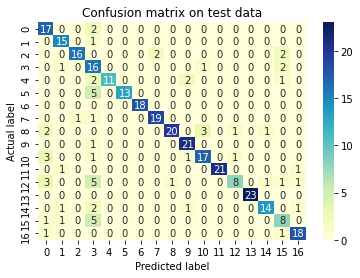

In [5]:
#we can see the shape from the above data that we have flattened our outputs for each image
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics #for confusion matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, make_scorer, accuracy_score
import pandas as pd
import numpy as np
import seaborn as sns

#k nearest neigbour based approach
myList=range(1,50)
neighbors = list(filter(lambda x: x % 2 != 0, myList)) #neighbours is a list of numbers like 1,3,5....49

clf_1=KNeighborsClassifier(algorithm="brute")

print("normally running KNN.........")
clf_1.fit(featuresTrain,trainY)
y_pred=clf_1.predict(featuresVal)
acc=accuracy_score(testY, y_pred)
print("\nthis is my models accuracy :{}".format(acc))
print("="*20)
print("now evaluating for optimal k settings")

tuned_parameters = {'n_neighbors': neighbors,"weights":["uniform","distance"]}

f1 = make_scorer(f1_score , average='macro')

model_1 = GridSearchCV(clf_1, tuned_parameters, scoring = f1, cv=3,n_jobs=-1, verbose=10)
model_1.fit(featuresTrain, trainY)
best_k=model_1.best_params_["n_neighbors"]
best_distance_metric=model_1.best_params_["weights"]

print(best_k,best_distance_metric)
print("\nthis is the hyper parameter optimized k value: {} and this is the distance metric used: {}".format(best_k,best_distance_metric))
y_pred=model_1.predict(featuresVal)
acc=accuracy_score(testY, y_pred)
print("\nthis is my models accuracy :{}".format(acc))

#plotting the confusion matrix from the data
confusion_matrix= metrics.confusion_matrix(testY,y_pred)
(tn, fp, fn, tp)=(confusion_matrix[0][0],confusion_matrix[0][1],confusion_matrix[1][0],confusion_matrix[1][1])
print("KNN confusion matrix using brute:")
print("\ntn:%d\nfp:%d\nfn:%d\ntp:%d\n"%(tn, fp, fn, tp))

p = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix on test data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("="*20)
print("The F1 score is the harmonic mean between the precision and recall hence we really don't need to calculate both of them ")
print("my f1 score on test: ",f1_score(testY,y_pred ,average="macro"))
print("my accuracy score on test: ",accuracy_score(testY,y_pred))
print("="*20)









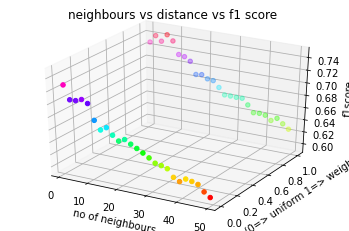

In [6]:
#plotting KNN results
#plotting the hyper parameters
from mpl_toolkits.mplot3d import Axes3D
res=model_1.cv_results_
res = pd.DataFrame(data= res)
#display(res)

neighbours_list=list(res["param_n_neighbors"])
weights_used=list(res["param_weights"])
f1_scores=list(res["mean_test_score"])

def text_to_num(text): 
    if(text=="uniform"):
        return 0
    return 1
weights_used = list(map(text_to_num, weights_used))




#now plot using the line plot from sklearn
fig = plt.figure()
ax = plt.axes(projection="3d")
z_points = f1_scores
x_points = neighbours_list
y_points = weights_used
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');
plt.title("neighbours vs distance vs f1 score ")
plt.xlabel("no of neighbours")
plt.ylabel("distance (0=> uniform 1=> weighted)")
ax.set_zlabel('f1score')

plt.show()

normally running LR.........

this is my models accuracy :0.9088235294117647
now evaluating for optimal k settings
Fitting 3 folds for each of 38 candidates, totalling 114 fits


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Do

3 l2

this is the hyper parameter optimized C value: 3 and this is the regularization term used: l2

this is my models accuracy :0.9117647058823529
KNN confusion matrix using brute:

tn:18
fp:0
fn:0
tp:16

The F1 score is the harmonic mean between the precision and recall hence we really don't need to calculate both of them 
my f1 score on test:  0.9074590322969533
my accuracy score on test:  0.9117647058823529


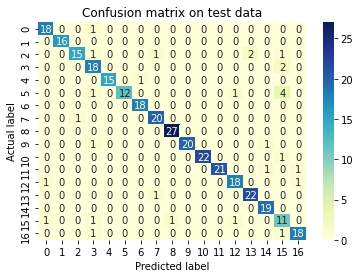

In [8]:
#now implementing logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics #for confusion matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, make_scorer, accuracy_score

#logistic regression based approach
lambdas=list(range(1,20))

c_values=lambdas

clf_3 = LogisticRegression(random_state=0)

print("normally running LR.........")
clf_3.fit(featuresTrain,trainY)
y_pred=clf_3.predict(featuresVal)
acc=accuracy_score(testY, y_pred)
print("\nthis is my models accuracy :{}".format(acc))
print("="*20)
print("now evaluating for optimal k settings")

tuned_parameters = {'C': c_values,"penalty":["l1","l2"]}

f1 = make_scorer(f1_score , average='macro')

model_3 = GridSearchCV(clf_3, tuned_parameters, scoring = f1, cv=3,n_jobs=-1, verbose=10)
model_3.fit(featuresTrain, trainY)
best_c=model_3.best_params_["C"]
best_regularizer=model_3.best_params_["penalty"]
print(best_c,best_regularizer)
print("\nthis is the hyper parameter optimized C value: {} and this is the regularization term used: {}".format(best_c,best_regularizer))
y_pred=model_3.predict(featuresVal)
acc=accuracy_score(testY, y_pred)
print("\nthis is my models accuracy :{}".format(acc))

#plotting the confusion matrix from the data
confusion_matrix= metrics.confusion_matrix(testY,y_pred)
(tn, fp, fn, tp)=(confusion_matrix[0][0],confusion_matrix[0][1],confusion_matrix[1][0],confusion_matrix[1][1])
print("KNN confusion matrix using brute:")
print("\ntn:%d\nfp:%d\nfn:%d\ntp:%d\n"%(tn, fp, fn, tp))

p = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix on test data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("="*20)
print("The F1 score is the harmonic mean between the precision and recall hence we really don't need to calculate both of them ")
print("my f1 score on test: ",f1_score(testY,y_pred ,average="macro"))
print("my accuracy score on test: ",accuracy_score(testY,y_pred))
print("="*20)

{'C': 3, 'penalty': 'l2'}
results (see below):


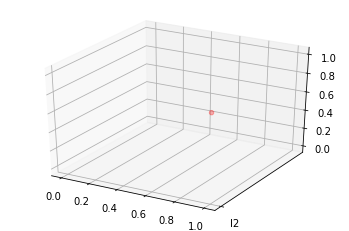

In [9]:
print(model_3.best_params_)
#plotting the hyper parameters
from mpl_toolkits.mplot3d import Axes3D
res=model_3.cv_results_
res = pd.DataFrame(data= res)
res=res[res["mean_test_score"].notnull()]

C_list=list(res["param_C"])
regularizer_used=list(res["param_penalty"])
f1_scores=list(res["mean_test_score"])
#print(f1_scores)

def text_to_num(text): 
    if(text=="l1"):
        return 0
    return 1
weights_used = list(map(text_to_num, weights_used))


#now plot using the line plot from sklearn has a bug so just save the parameters
try:
    fig = plt.figure()
    ax = plt.axes(projection="3d") #has
    z_points = f1_scores
    x_points = C_list
    y_points = regularizer_used
    ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');
    plt.title("neighbours vs regularizer vs f1 score ")
    plt.xlabel("C values")
    plt.ylabel("regularizer (0=> l1 1=> l2)")
    ax.set_zlabel('f1score')
    plt.show()
except:
    print("results (see below):")

In [16]:
#since we see that the tuning does not help alot for the above classifiers let's run the classifier with default setting
from sklearn.ensemble import RandomForestClassifier
clf_1 = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2,n_jobs=-1, random_state=0)
# evaluate the model
print("normally running Random forest.........")
clf_1.fit(featuresTrain,trainY)
y_pred=clf_1.predict(featuresVal)
acc=accuracy_score(testY, y_pred)
print("\nthis is my models accuracy :{}".format(acc))
print("="*20)


#svm on feature extracted data 
from sklearn.svm import SVC
clf = SVC(C=1.0, kernel='rbf',gamma='auto',random_state=0)
clf.fit(featuresTrain, trainY)
# evaluate the model
print("running svm with rbf kernel since we implemented logistic regression before....")
print("svm with linear kernel is similar to logistic regression")
print("normally running SVM.........")
clf.fit(featuresTrain,trainY)
y_pred=clf.predict(featuresVal)
acc=accuracy_score(testY, y_pred)
print("\nthis is my models accuracy :{}".format(acc))
print("="*20)
print("now evaluating for optimal k settings")


normally running Random forest.........

this is my models accuracy :0.6264705882352941
now evaluating for optimal estimator(tree) settings
running svm with rbf kernel since we implemented logistic regression before....
svm with linear kernel is similar to logistic regression
normally running SVM.........

this is my models accuracy :0.9
now evaluating for optimal k settings


Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_407 (Conv2D)             (None, 63, 63, 32)   864         input_12[0][0]                   
__________________________________________________________________________________________________
batch_normalization_412 (BatchN (None, 63, 63, 32)   96          conv2d_407[0][0]                 
__________________________________________________________________________________________________
activation_406 (Activation)     (None, 63, 63, 32)   0           batch_normalization_412[0][0]    
________________________________________________________________________________

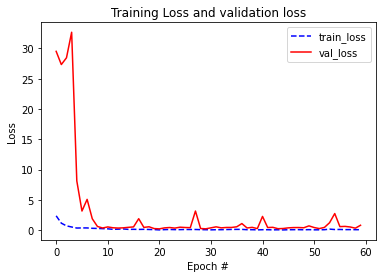

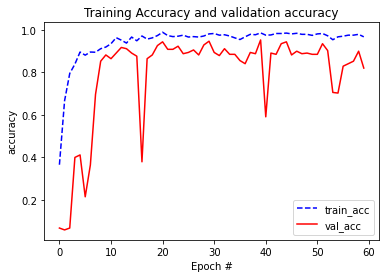

In [21]:
#fine tuning the CNN's 

hybrid_model = tf.keras.applications.InceptionResNetV2(input_shape= (trainX.shape[2],trainX.shape[1],3), include_top=False, weights="imagenet")
print(hybrid_model.summary())
model = tf.keras.models.Sequential() 
model.add(hybrid_model) 
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(classes, activation='softmax'))

print(model.summary())
fname="best_weights.hdf5"
aug = tf.keras.preprocessing.image.ImageDataGenerator(
    #note we are not applying standardization as it is already applied
    rotation_range=20, #we want random rotation of upto 20 degrees
    width_shift_range=0.1, #width shift by 0.1 x
    shear_range=0.2, # s
    zoom_range=0.4, 
    horizontal_flip=True)


# initialize the optimizer and model print("Compiling model...")
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
NUM_EPOCHS = 60 #no dropouts used hence same epochs
classes=len(np.unique(trainY, axis=0)) #unique classes in the training data


#loss is sparse because we have int features
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
#print(model.summary())
# train the network
print("Training network...")


checkpoint = tf.keras.callbacks.ModelCheckpoint(fname, monitor="val_accuracy",
mode="max", save_best_only=True, verbose=1) #track the maximum accuracy model and not min loss model

history=model.fit(aug.flow(trainX, trainY, batch_size=32),
                    steps_per_epoch=len(trainX) / 32, epochs=NUM_EPOCHS,
                  validation_data=(testX, testY),callbacks=[checkpoint])


draw_plot(history,NUM_EPOCHS)

In [48]:

#####load weights from the disk
model.load_weights("best_weights.hdf5")
print("Loaded model from disk")

from sklearn.metrics import accuracy_score
y_pred=model.predict(testX)
print(y_pred.shape)
y_pred=np.argmax(y_pred,axis=1)
print(accuracy_score(y_pred,testY))

Loaded model from disk
(340, 17)
0.9529411764705882


In [102]:
#controlling which layer to change and which not to 
hybrid_model.trainable = True 
trainableFlag = False

count=0
total=780
fraction=0.40 #keeps the first n fraction non trainable weights of image net
print("trainable after layer: {} means keep {} layer imagenet and all othes {} part of learning process".format(round(total*fraction),round(total*fraction),total-round(total*fraction)))
for layer in hybrid_model.layers:
    count+=1
    if count == round(total*fraction): 
        print(count)
        print("turning layer {} onwards to be trainable".format(layer))
        trainableFlag = True
    layer.trainable = trainableFlag #depending upon the flag change the layer

#print(hybrid_model.summary())

trainable after layer: 312 means keep 312 layer imagenet and all othes 468 part of learning process
312
turning layer <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f68dc979c50> onwards to be trainable


Training network...
Epoch 1/60
16/15 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.9990
Epoch 00001: val_accuracy improved from -inf to 0.95294, saving model to best_weights.hdf5
16/15 [==============================] - 13s 792ms/step - loss: 0.0018 - accuracy: 0.9990 - val_loss: 0.2967 - val_accuracy: 0.9529
Epoch 2/60
16/15 [==============================] - ETA: 0s - loss: 1.8288e-04 - accuracy: 1.0000
Epoch 00002: val_accuracy did not improve from 0.95294
16/15 [==============================] - 4s 257ms/step - loss: 1.8288e-04 - accuracy: 1.0000 - val_loss: 0.3000 - val_accuracy: 0.9471
Epoch 3/60
16/15 [==============================] - ETA: 0s - loss: 2.5223e-05 - accuracy: 1.0000
Epoch 00003: val_accuracy did not improve from 0.95294
16/15 [==============================] - 4s 253ms/step - loss: 2.5223e-05 - accuracy: 1.0000 - val_loss: 0.3030 - val_accuracy: 0.9500
Epoch 4/60
16/15 [==============================] - ETA: 0s - loss: 4.3390e-05 - accura

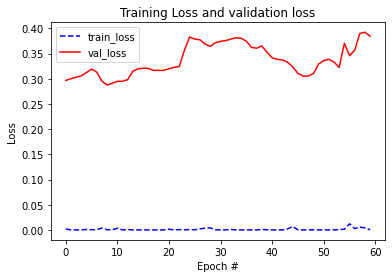

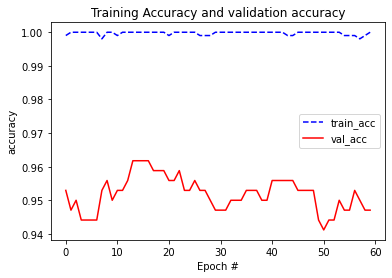

In [104]:
##train a network of this 
# initialize the optimizer and model print("Compiling model...")
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
NUM_EPOCHS = 60 #no dropouts used hence same epochs
classes=len(np.unique(trainY, axis=0)) #unique classes in the training data


#loss is sparse because we have int features
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
#print(model.summary())
# train the network
print("Training network...")


checkpoint = tf.keras.callbacks.ModelCheckpoint(fname, monitor="val_accuracy",
mode="max", save_best_only=True, verbose=1) #track the maximum accuracy model and not min loss model

history=model.fit(aug.flow(trainX, trainY, batch_size=64),
                    steps_per_epoch=len(trainX) / 64, epochs=NUM_EPOCHS,
                  validation_data=(testX, testY),callbacks=[checkpoint])

draw_plot(history,NUM_EPOCHS)

In [ ]:
# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")